In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target

bos = bos.sample(frac = 1,random_state=3)

In [68]:
y = bos.Price
x = bos.drop(['Price'],axis=1)

# recursive feature elimination

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression()

rfe = RFE(lr, n_features_to_select= 10)
rfe.fit(x,y)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [70]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True])

In [71]:
pd.DataFrame(rfe.ranking_,index=x.columns,columns=['select'])

,select
CRIM,1
ZN,1
INDUS,1
CHAS,1
NOX,1
RM,1
AGE,4
DIS,1
RAD,1
TAX,2


In [82]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)

In [83]:
x.shape[1]

13

In [84]:
no_ofcols = x.shape[1]
score_list = []
rmse_list = []
for n in range(no_ofcols):
    model  = LinearRegression() 
    rfe  = RFE(model,n_features_to_select=n+1)
    rfe.fit(X_train,y_train)
    y_test_pred = rfe.predict(X_test)
    score = r2_score(y_test,y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_list.append(rmse)
    score_list.append(score)

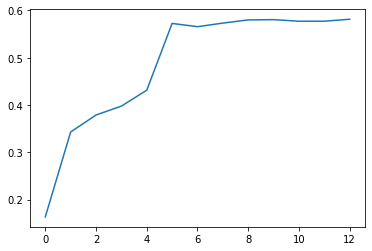

In [85]:
plt.plot(score_list)

In [86]:
score_list

[0.16348822635766036,
 0.3430364519606568,
 0.37894253632805186,
 0.397697423941613,
 0.4313148307898742,
 0.5725284799620725,
 0.5656202009687706,
 0.5731962746104835,
 0.5799406964717686,
 0.5805492278662603,
 0.5771563742038247,
 0.5771620879588306,
 0.5813557734289051]

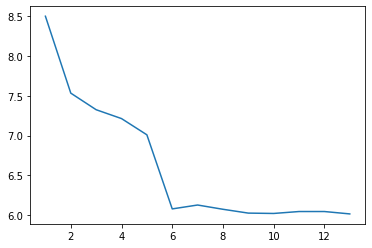

In [87]:
plt.plot(range(1,14),rmse_list)

In [88]:
rmse_list

[8.502771474929627,
 7.535205736901996,
 7.326395688933875,
 7.2149252885621635,
 7.0106845974664616,
 6.07824316926824,
 6.127160940444648,
 6.073493607536484,
 6.025315352747143,
 6.0209493948743775,
 6.045251479748807,
 6.04521063580499,
 6.015157884854259]

the result of r2 and the rmse shows that we are getting wery closed to getting the max when no of features=10 hence, we will choose 10 as optimal number to keep

In [90]:
rfe = RFE(lr, n_features_to_select= 10)
rfe.fit(x,y)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [91]:
rf = pd.DataFrame(rfe.ranking_,index=x.columns,columns=['ranks'])
rf = rf.sort_values(by='ranks')
rf

,ranks
CRIM,1
ZN,1
INDUS,1
CHAS,1
NOX,1
RM,1
DIS,1
RAD,1
PTRATIO,1
LSTAT,1


In [93]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [113]:
from sklearn.model_selection import KFold, GridSearchCV
kf = KFold(n_splits=3, random_state=3)
params = {'n_features_to_select':list(range(1,14))}
rfe = RFE(lr)

gsearch = GridSearchCV(rfe, param_grid=params, cv=kf, scoring='r2', return_train_score= True)

gsearch.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=False),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [114]:
gsearch.best_params_

{'n_features_to_select': 13}

In [115]:
gs=pd.DataFrame(gsearch.cv_results_)

In [116]:
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.012300,0.002860,0.000997,2.247832e-07,1,{'n_features_to_select': 1},0.199862,0.158002,0.184327,0.180723,0.017294,13,0.174418,0.192692,0.180015,0.182375,0.007644
1,0.007371,0.005473,0.000621,8.775536e-04,2,{'n_features_to_select': 2},0.620833,0.497652,0.483520,0.534101,0.061690,12,0.494590,0.552738,0.561023,0.536117,0.029558
2,0.008571,0.002248,0.000997,1.946680e-07,3,{'n_features_to_select': 3},0.587543,0.524968,0.519504,0.544053,0.030878,11,0.535370,0.569403,0.568948,0.557907,0.015937
3,0.005140,0.003641,0.005540,7.140947e-03,4,{'n_features_to_select': 4},0.662637,0.588033,0.569893,0.606927,0.040140,10,0.589695,0.628191,0.634907,0.617598,0.019920
4,0.005207,0.007364,0.000000,0.000000e+00,5,{'n_features_to_select': 5},0.693000,0.600449,0.581944,0.625216,0.048591,9,0.601537,0.648881,0.656495,0.635638,0.024312
5,0.010418,0.007367,0.000000,0.000000e+00,6,{'n_features_to_select': 6},0.700710,0.713764,0.686559,0.700372,0.011103,8,0.714600,0.713370,0.728041,0.718670,0.006645
6,0.010410,0.007361,0.000000,0.000000e+00,7,{'n_features_to_select': 7},0.702322,0.714972,0.691022,0.702795,0.009778,7,0.716280,0.714876,0.728228,0.719795,0.005991
7,0.005208,0.007365,0.000000,0.000000e+00,8,{'n_features_to_select': 8},0.700323,0.716841,0.702997,0.706728,0.007244,6,0.726207,0.722541,0.730030,0.726259,0.003057
8,0.005207,0.007364,0.000000,0.000000e+00,9,{'n_features_to_select': 9},0.696847,0.719058,0.704387,0.706769,0.009230,5,0.728747,0.723012,0.730782,0.727514,0.003290
9,0.005207,0.007364,0.000000,0.000000e+00,10,{'n_features_to_select': 10},0.702860,0.710238,0.710827,0.707969,0.003626,4,0.731013,0.731615,0.733411,0.732013,0.001018


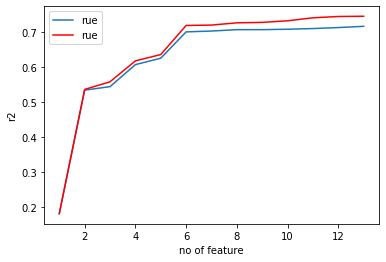

In [123]:
plt.plot(gs['param_n_features_to_select'], gs['mean_test_score'],label='rue')
plt.plot(gs['param_n_features_to_select'], gs['mean_train_score'],'r',label='rue')
plt.xlabel('no of feature')
plt.legend()
plt.ylabel('r2')
plt.show()

# step Forward selection

In [124]:
import mlxtend

In [126]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [128]:
lr = LinearRegression()

kf = KFold(n_splits=3, random_state=3)
sfs1 = sfs(lr,k_features=13, scoring='r2',cv=kf , verbose=2)

sfs1.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2020-03-11 14:21:17] Features: 1/13 -- score: 0.5385442127122603[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2020-03-11 14:21:17] Features: 2/13 -- score: 0.62822010699234[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2020-03-11 14:21:17] Features: 3/13 -- score: 0.6686934564375585[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=3, random_state=3, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=2)

In [129]:
sfs1.subsets_

{1: {'feature_idx': (12,),
  'cv_scores': array([0.47498301, 0.56609828, 0.57455135]),
  'avg_score': 0.5385442127122603,
  'feature_names': ('LSTAT',)},
 2: {'feature_idx': (5, 12),
  'cv_scores': array([0.60036603, 0.65293983, 0.63135447]),
  'avg_score': 0.62822010699234,
  'feature_names': ('RM', 'LSTAT')},
 3: {'feature_idx': (5, 10, 12),
  'cv_scores': array([0.65745471, 0.68441498, 0.66421068]),
  'avg_score': 0.6686934564375585,
  'feature_names': ('RM', 'PTRATIO', 'LSTAT')},
 4: {'feature_idx': (5, 7, 10, 12),
  'cv_scores': array([0.67016622, 0.70001991, 0.67424572]),
  'avg_score': 0.6814772826504827,
  'feature_names': ('RM', 'DIS', 'PTRATIO', 'LSTAT')},
 5: {'feature_idx': (4, 5, 7, 10, 12),
  'cv_scores': array([0.70589773, 0.70338011, 0.67346229]),
  'avg_score': 0.6942467104909952,
  'feature_names': ('NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')},
 6: {'feature_idx': (4, 5, 7, 10, 11, 12),
  'cv_scores': array([0.71000238, 0.71462993, 0.67781512]),
  'avg_score': 0.700815811

In [132]:
sf = pd.DataFrame(sfs1.subsets_).T
sf

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)","[0.4749830090548759, 0.5660982817170748, 0.574...",0.538544,"(LSTAT,)"
2,"(5, 12)","[0.6003660252605315, 0.6529398298950582, 0.631...",0.62822,"(RM, LSTAT)"
3,"(5, 10, 12)","[0.6574547085117268, 0.6844149765905738, 0.664...",0.668693,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)","[0.6701662157084982, 0.7000199113250302, 0.674...",0.681477,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)","[0.7058977311250213, 0.7033801102200267, 0.673...",0.694247,"(NOX, RM, DIS, PTRATIO, LSTAT)"
6,"(4, 5, 7, 10, 11, 12)","[0.7100023770635135, 0.7146299333738408, 0.677...",0.700816,"(NOX, RM, DIS, PTRATIO, B, LSTAT)"
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7042370034440062, 0.7236060770908831, 0.689...",0.705848,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
8,"(3, 4, 5, 7, 8, 10, 11, 12)","[0.7072017496995521, 0.7274380228793207, 0.695...",0.710058,"(CHAS, NOX, RM, DIS, RAD, PTRATIO, B, LSTAT)"
9,"(3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.715543873547657, 0.733556097889901, 0.69250...",0.713867,"(CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT)"
10,"(1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7239641006709546, 0.7267455672126852, 0.699...",0.716864,"(ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B,..."


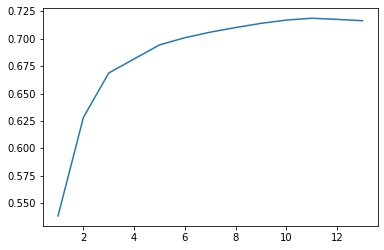

In [133]:
plt.plot(range(1,14), sf.avg_score)
plt.

Verbose = 2, output showed that r-sqaured value is reaching peak at 'number of features'=11. Hence, we will run sfs again with k_features=11 to identify the selected features.

In [135]:
lr = LinearRegression()

kf = KFold(n_splits=3, random_state=3)
sfs1 = sfs(lr,k_features=13, scoring='r2',cv=kf)

sfs1.fit(x,y)

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=3, random_state=3, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [136]:
sfs1

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=3, random_state=3, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [138]:
list(sfs1.k_feature_names_)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [142]:
cols = list(sfs1.k_feature_names_)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x[cols], y, test_size=0.30, random_state=3)

In [147]:
lr.fit(X_train,y_train)
y_train_pred= lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('r-square for train: ', r2_score(y_train,y_train_pred))


print('r-square for test: ', r2_score(y_test,y_test_pred))


r-square for train:  0.7930655301640464
r-square for test:  0.5813557734289051
